In [1]:
from PIL import Image, ImageDraw, ImageFilter
import os
import random
class Item:
    def __init__(self, imagePath, name = None):
        self.image = Image.open(imagePath)
        self.name = name
        if self.name is None:
            self.name = os.path.splitext(os.path.basename(imagePath))[0]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def circle_points(r, n):
    t = np.linspace(0, 2 * np.pi, n)
    x = r * np.cos(t)
    y = r * np.sin(t)
    circle = (np.c_[x, y])
    return circle

circles = circle_points(0.1, 10)
plt.show()

In [3]:
!pip install emoji

In [4]:
import requests
import re
import urllib
import json
from emoji.unicode_codes import UNICODE_EMOJI
class EmojiConverter:
    def __init__(self):
        self.data = requests.get('https://unicode.org/emoji/charts/full-emoji-list.html').text
    def to_base64_png(self, emoji, version=0, path = "image/"):
        """For different versions, you can set version = 0 for , """
        html_search_string = r"<img alt='{}' class='imga' src='data:image/png;base64,([^']+)'>" #'
        matchlist = re.findall(html_search_string.format(emoji), self.data)
#         print(matchlist)
        if (matchlist):
#             if (len(matchlist) >= 1) & (matchlist[version] is str):
            image_link = "data:image/png;base64," + matchlist[version]
            # Save image
#             return image_link
            emoji_name = str(UNICODE_EMOJI[emoji])[1:-1]
            urllib.request.urlretrieve(image_link, path + emoji_name + ".png")
            return emoji_name
# One Time File Generate
e = EmojiConverter()
selectedEmojiList = "🤡☠️😽️🦶🦷👅🧠🧜‍♀️🐽🦄🦉🦇🦋🐞🕸🐢🦓🦚🍄⭐️☃️🥑🥝🥦🌽🧀🍭️🎻🎮🎹🛸️🦠📌️📎💯❗️️️🎲🧊"
emojiNameList = []
# a = e.to_base64_png(selectedEmojiList[0])
for i in selectedEmojiList:    
    emojiName = e.to_base64_png(i)
    if emojiName is not None:
        emojiNameList.append(emojiName) 
with open('emojiNameList.json', 'w') as f:
    f.write(json.dumps(emojiNameList))

In [5]:
import json


#Now read the file back into a Python list object
with open('emojiNameList.json', 'r') as f:    
    emojiNameList = json.loads(f.read())
emojiNameList

['clown_face',
 'skull_and_crossbones',
 'kissing_cat_face',
 'foot',
 'tooth',
 'tongue',
 'brain',
 'merperson',
 'female_sign',
 'pig_nose',
 'unicorn_face',
 'owl',
 'bat',
 'butterfly',
 'lady_beetle',
 'spider_web',
 'turtle',
 'zebra',
 'peacock',
 'mushroom',
 'white_medium_star',
 'snowman',
 'avocado',
 'kiwi_fruit',
 'broccoli',
 'ear_of_corn',
 'cheese_wedge',
 'lollipop',
 'violin',
 'video_game',
 'musical_keyboard',
 'flying_saucer',
 'microbe',
 'pushpin',
 'paperclip',
 'hundred_points',
 'exclamation_mark',
 'game_die',
 'ice']

In [6]:
ITEMBASEPOINTLIST = [(148, 95),
( 233, 78),
( 316, 130),
( 361, 215),
( 320, 301),
( 239, 346),
( 149, 332),
( 84, 262),
( 85, 166),
( 214, 214)]



def pickSpotCardAB(itemList, totalItemNum = 7):
    target = random.choice(itemList)
    itemList.remove(target)
    cardA = [target,]
    for i in range(0, totalItemNum):
        cardAItem = random.choice(itemList)
        cardA.append(cardAItem) 
        itemList.remove(cardAItem)
    cardB = [target,]
    for i in range(0, totalItemNum):
        cardBItem = random.choice(itemList)
        cardB.append(cardBItem) 
        itemList.remove(cardBItem)
    return(cardA, cardB)


def createEmptyCard(size = 500, outline = None):
    if outline is None:
        outline = size / 100
    im = Image.new('RGBA', (size, size), (255, 255, 255))
    draw = ImageDraw.Draw(im)
    draw.ellipse((size/20-outline, size/20-outline, 19*size/20+outline, 19*size/20+outline), fill=(0, 0, 0))
    draw.ellipse((size/20, size/20, 19*size/20, 19*size/20), fill=(255, 255, 255))
    return im


def getRandomDeviation(devation = 10):
    return random.randint(-devation, devation)


def applyRandomRotation(image):
    return image.rotate(random.randint(-180, 180), expand = 1)


def applyRandomSizeTransformation(image, maxResizeRatio = 2.5, meanSize = 2.5):
    resizeRatio = (random.random() * (maxResizeRatio * meanSize - 1) + 1 ) 
    if random.random() < 0.7:
        size = tuple( i * meanSize * resizeRatio for i in image.size)
    else:
        size = tuple( i * meanSize / resizeRatio for i in image.size)
    image.thumbnail(size)
    return image
    
    
def createSpotCard(itemList, baseCard = createEmptyCard(), itemBasePointList = ITEMBASEPOINTLIST[:]):
    random.shuffle(itemBasePointList)
    itemBasePointList = itemBasePointList[:]
    for item in itemList:
        itemBasePoint = itemBasePointList.pop()
        devation = getRandomDeviation()
        rotatedItem = applyRandomSizeTransformation(applyRandomRotation(item))
        baseCard.paste(rotatedItem, tuple( i + devation for i in itemBasePoint), mask = rotatedItem)
    return baseCard


def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst


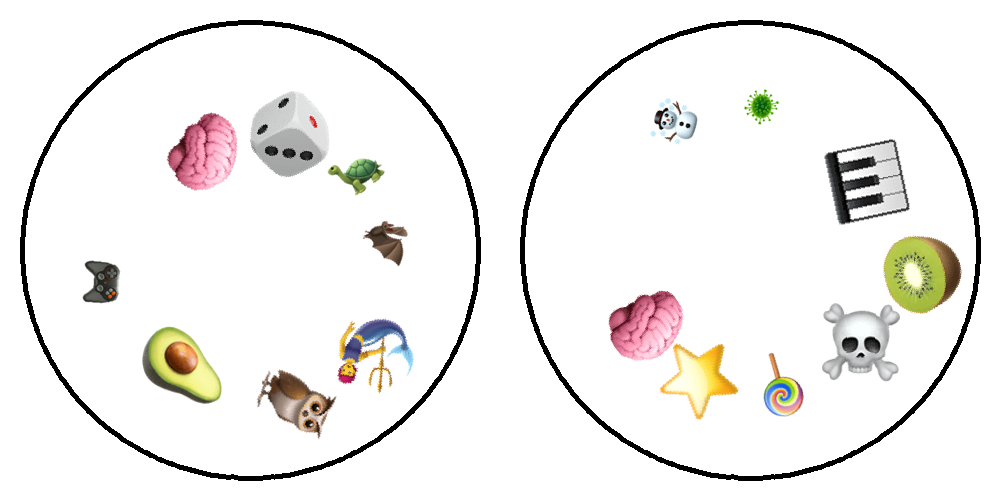

In [15]:
itemList = []
random.shuffle(emojiNameList)
for i in range(15):
    item = Image.open('image/' + emojiNameList[i] + '.png').convert("RGBA")
    item = item.resize((80,80)).convert("RGBA")
    itemList.append(item)

spotCards = pickSpotCardAB(itemList, totalItemNum=7)
spotCardA = createSpotCard(spotCards[0], baseCard= createEmptyCard())
spotCardB = createSpotCard(spotCards[1], baseCard= createEmptyCard())
finalCard = get_concat_h(spotCardA, spotCardB)
n = 1
finalCard.thumbnail((n*1000, n*2000))
finalCard